## Creating Dataset

In [0]:
x_values=[i for i in range(11)]

In [2]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [0]:
y_values=[2*i +1 for i in range(11) ] 

In [4]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [0]:
import numpy as np

In [6]:
x_train=np.array(x_values,dtype= np.float32)
x_train.shape

(11,)

In [0]:
 x_train =x_train.reshape(-1,1)

In [8]:
y_train=np.array(y_values,dtype=np.float32)
y_train.shape

(11,)

In [9]:
y_train=y_train.reshape(-1,1)
y_train.shape

(11, 1)

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

## Create Model

In [0]:
from torch import *

In [0]:
class LinearRM(nn.Module):
  def __init__(self,in_dim,out_dim):
    super(LinearRM,self).__init__()
    self.linear=nn.Linear(in_dim,out_dim)
    
  def forward(self,x):
    out=self.linear(x)
    return out

In [0]:
in_dim=1
out_dim=1
model = LinearRM(in_dim,out_dim)

In [0]:
criterion= nn.MSELoss()

In [0]:
lr = 0.01
epochs=100

In [0]:
optmzr = torch.optim.SGD(model.parameters(),lr = lr)

In [80]:
epochs = 200
for epoch in range(epochs):
  
  x= torch.from_numpy(x_train) #############Variable API is DEPRECATED now,EVERYTHING'S BEEN INCORPORATED IN TENSORS######################
  y= torch.from_numpy(y_train)
  
  optmzr.zero_grad()
  
  output=model(x)
  
  loss=criterion(output,y)
  
  loss.backward()
  
  optmzr.step()
  
  print('epoch# : {} ::--::--:: loss : {}'.format(epoch+1,loss))

epoch# : 1 ::--::--:: loss : 64.0210418701
epoch# : 2 ::--::--:: loss : 5.26064586639
epoch# : 3 ::--::--:: loss : 0.467313706875
epoch# : 4 ::--::--:: loss : 0.0759112015367
epoch# : 5 ::--::--:: loss : 0.0435634180903
epoch# : 6 ::--::--:: loss : 0.0405075550079
epoch# : 7 ::--::--:: loss : 0.03984567523
epoch# : 8 ::--::--:: loss : 0.0393836311996
epoch# : 9 ::--::--:: loss : 0.038942489773
epoch# : 10 ::--::--:: loss : 0.0385074838996
epoch# : 11 ::--::--:: loss : 0.0380774512887
epoch# : 12 ::--::--:: loss : 0.0376522764564
epoch# : 13 ::--::--:: loss : 0.037231747061
epoch# : 14 ::--::--:: loss : 0.0368160381913
epoch# : 15 ::--::--:: loss : 0.0364049375057
epoch# : 16 ::--::--:: loss : 0.0359984710813
epoch# : 17 ::--::--:: loss : 0.03559634462
epoch# : 18 ::--::--:: loss : 0.0351989232004
epoch# : 19 ::--::--:: loss : 0.0348058156669
epoch# : 20 ::--::--:: loss : 0.0344171449542
epoch# : 21 ::--::--:: loss : 0.034032844007
epoch# : 22 ::--::--:: loss : 0.0336527824402
epoch# : 

## **Inference**

In [0]:
predictions= model(torch.from_numpy(x_train))

In [95]:
predictions=predictions.data.numpy()
predictions

array([[ 0.8743915],
       [ 2.8924804],
       [ 4.910569 ],
       [ 6.928658 ],
       [ 8.946747 ],
       [10.964836 ],
       [12.982924 ],
       [15.001013 ],
       [17.019102 ],
       [19.037191 ],
       [21.05528  ]], dtype=float32)

In [83]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

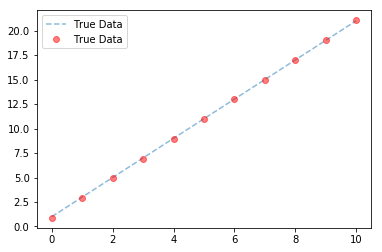

In [113]:
plt.clf()

plt.plot(x_train,y_train,'--',label='True Data',alpha = 0.5)

plt.plot(x_train,predictions,'ro',label='True Data',alpha = 0.5)

plt.legend(loc='best')
plt.show()

In [0]:
torch.save(model.state_dict(),'linrm.pkl')